In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PRCurve import PRCurve
from ROCCurve import ROCCurve
from Utils import Area, Plot

In [2]:
preds = np.array([0.14, 0.23, 0.39, 0.52, 0.73, 0.9])
labels = np.array([0, 1, 0, 0, 1, 1])

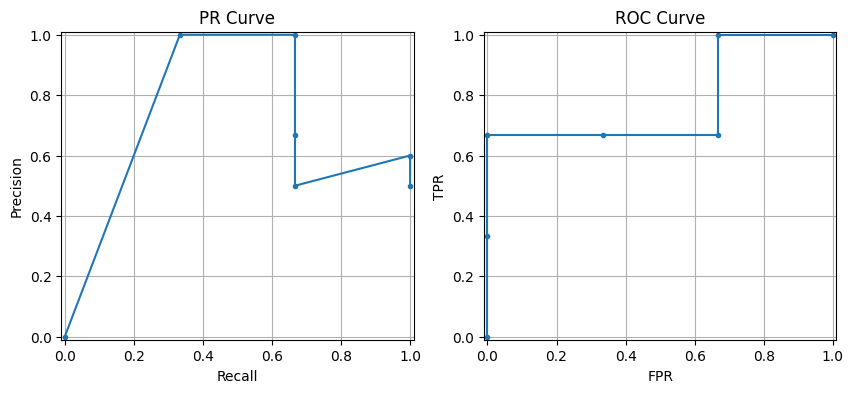

In [3]:
pr_curve = PRCurve(preds, labels)
roc_curve = ROCCurve(preds, labels)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
Plot(pr_curve, axs[0])
Plot(roc_curve, axs[1])
plt.show()

In [4]:
print("AUC of PR curve = ", Area(pr_curve))
print("AUC of ROC curve = ", Area(roc_curve))

AUC of PR curve =  0.6833333333333333
AUC of ROC curve =  0.7777777777777778
